In [1]:
# Example from Programming Collective Intelligence, Chapter 7

### Decision tree modelling ###
The main goal is to predict if a user will become a paying customer

In [2]:
from treepredict import *

my_data = [['slashdot', 'USA', 'yes', 18, 'None'],
           ['google', 'France', 'yes', 23, 'Premium'],
           ['digg', 'USA', 'yes', 24, 'Basic'],
           ['kiwitobes', 'France', 'yes', 23, 'Basic'],
           ['google', 'UK', 'no', 21, 'Premium'],
           ['(direct)', 'New Zealand', 'no', 12, 'None'],
           ['(direct)', 'UK', 'no', 21, 'Basic'],
           ['google', 'USA', 'no', 24, 'Premium'],
           ['slashdot', 'France', 'yes', 19, 'None'],
           ['digg', 'USA', 'no', 18, 'None'],
           ['google', 'UK', 'no', 18, 'None'],
           ['kiwitobes', 'UK', 'no', 19, 'None'],
           ['digg', 'New Zealand', 'yes', 12, 'Basic'],
           ['slashdot', 'UK', 'no', 21, 'None'],
           ['google', 'UK', 'yes', 18, 'Basic'],
           ['kiwitobes', 'France', 'yes', 19, 'Basic']]

Divides the rows into two sets based by the Read FAQ column:

In [3]:
divideset(my_data, 2, 'yes')

([['slashdot', 'USA', 'yes', 18, 'None'],
  ['google', 'France', 'yes', 23, 'Premium'],
  ['digg', 'USA', 'yes', 24, 'Basic'],
  ['kiwitobes', 'France', 'yes', 23, 'Basic'],
  ['slashdot', 'France', 'yes', 19, 'None'],
  ['digg', 'New Zealand', 'yes', 12, 'Basic'],
  ['google', 'UK', 'yes', 18, 'Basic'],
  ['kiwitobes', 'France', 'yes', 19, 'Basic']],
 [['google', 'UK', 'no', 21, 'Premium'],
  ['(direct)', 'New Zealand', 'no', 12, 'None'],
  ['(direct)', 'UK', 'no', 21, 'Basic'],
  ['google', 'USA', 'no', 24, 'Premium'],
  ['digg', 'USA', 'no', 18, 'None'],
  ['google', 'UK', 'no', 18, 'None'],
  ['kiwitobes', 'UK', 'no', 19, 'None'],
  ['slashdot', 'UK', 'no', 21, 'None']])

Calculate Gini impurity and entropy:

In [4]:
print "Gini impurity of the whole dataset: %f" % giniimpurity(my_data)
print "Entropy of the whole dataset: %f" % entropy(my_data)
set1, set2 = divideset(my_data, 2, 'yes')
print "Gini impurity of partial dataset (Read FAQ = yes): %f" % giniimpurity(set1)
print "Entropy of partial dataset (Read FAQ = yes): %f" % entropy(set1)
print "Gini impurity of partial dataset (Read FAQ = no): %f" % giniimpurity(set2)
print "Entropy of partial dataset (Read FAQ = no): %f" % entropy(set2)

Gini impurity of the whole dataset: 0.632812
Entropy of the whole dataset: 1.505241
Gini impurity of partial dataset (Read FAQ = yes): 0.531250
Entropy of partial dataset (Read FAQ = yes): 1.298795
Gini impurity of partial dataset (Read FAQ = no): 0.531250
Entropy of partial dataset (Read FAQ = no): 1.298795


Build decision tree and print it:

In [5]:
tree = buildtree(my_data)
printtree(tree)

0:google? 
T-> 3:21? 
  T-> {'Premium': 3}
  F-> 2:yes? 
    T-> {'Basic': 1}
    F-> {'None': 1}
F-> 0:slashdot? 
  T-> {'None': 3}
  F-> 2:yes? 
    T-> {'Basic': 4}
    F-> 3:21? 
      T-> {'Basic': 1}
      F-> {'None': 3}


Represent this decision tree visually:

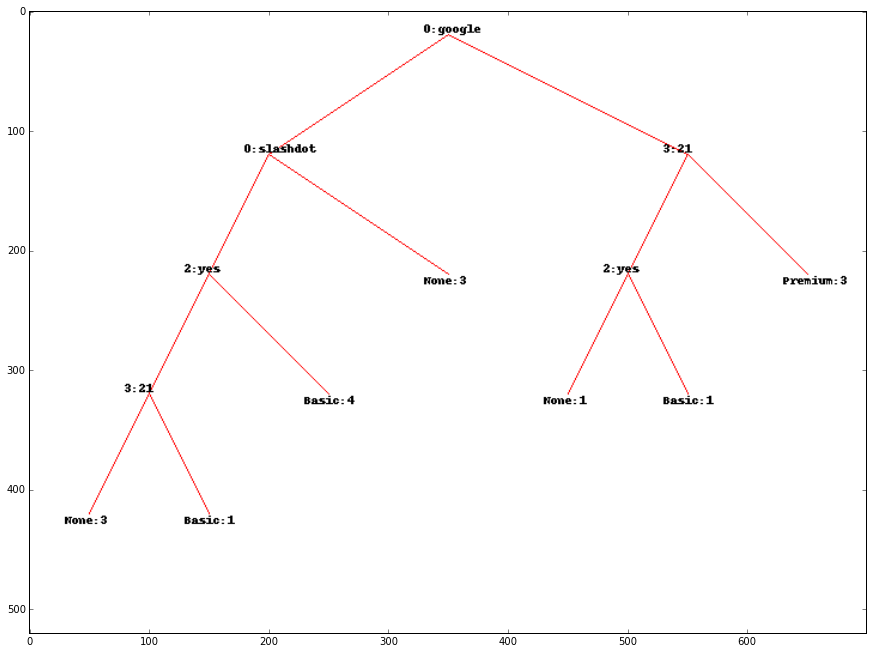

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

img = drawtree(tree)
fig2 = plt.figure(figsize = (15,45))
ax3 = fig2.add_subplot(111)
ax3.imshow(img)
plt.show()
img.save('treeview.jpg', 'JPEG')

Classify new instance:

In [11]:
classify(['(direct)', 'USA', 'yes', 5], tree)

{'Basic': 4}

Prune tree (minimum gain 0.1):

In [12]:
prune(tree, 0.1)
printtree(tree)

0:google? 
T-> 3:21? 
  T-> {'Premium': 3}
  F-> 2:yes? 
    T-> {'Basic': 1}
    F-> {'None': 1}
F-> 0:slashdot? 
  T-> {'None': 3}
  F-> 2:yes? 
    T-> {'Basic': 4}
    F-> 3:21? 
      T-> {'Basic': 1}
      F-> {'None': 3}


Prune tree (minimum gain 1.0):

In [13]:
prune(tree, 1.0)
printtree(tree)

0:google? 
T-> 3:21? 
  T-> {'Premium': 3}
  F-> 2:yes? 
    T-> {'Basic': 1}
    F-> {'None': 1}
F-> {'None': 6, 'Basic': 5}


Classify new instances:

In [14]:
print mdclassify(['google', None, 'yes', None], tree)
print mdclassify(['google', 'France', None, None], tree)

{'Premium': 2.25, 'Basic': 0.25}
{'None': 0.125, 'Premium': 2.25, 'Basic': 0.125}
